In [1]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
import PIL.ImageOps


In [8]:
import cv2
from scipy import ndimage
import PIL
import PIL.ImageOps
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#feature extraction

def extract_features(path):
    image = cv2.imread(path,0)
    img = Image.open(path)
    plt.imshow(img)
    plt.show()
    imagecopy = image.copy()
    edged = cv2.Canny(image, 10, 250)
    #cv2.imshow("Edges", edged)
    #cv2.waitKey(0)
    img = Image.fromarray(edged.astype('uint8'))
    plt.imshow(img)
    plt.show()
    #applying closing function 
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
    closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
    #cv2.imshow("Closed", closed)
    #cv2.waitKey(0)
    img = Image.fromarray(closed.astype('uint8'))
    plt.imshow(img)
    plt.show()
    l = []
    bb = []
    idx = 0
    #finding_contours 
    (I, cnts,_) = cv2.findContours(closed.copy(),
                cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    bb = []
    for c in cnts:
        bb.append(cv2.boundingRect(c))
    bb.sort()
    #for i, contour in enumerate(cnts):
    #    x, y, w, h = cv2.boundingRect(contour) 
    #    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 1)
    #cv2.imshow("Output", image)
    #cv2.waitKey(0)
    charNo=0
    for i in bb:
        charNo += 1
        x,y,w,h = i
        new_img = image[y:y+h, x:x+w]
        img1 = Image.fromarray(new_img.astype('uint8'))
        l.append(process_img(img1))
        plt.subplot(10, 10, charNo)
        plt.imshow(img1)
    plt.show()
    return l

#process extracted features
def process_img(path):
    #img = Image.open(path)
    #plt.imshow(img)
    #plt.show()
    img = path
    img = img.convert('L')
    #plt.imshow(img)
    #plt.show()
    img = PIL.ImageOps.invert(img)
    #plt.imshow(img)
    #plt.show()
    ar = np.asarray(img)
    #print(ar.shape)
    v = ar.shape[0]
    h = ar.shape[1]
    m = abs(v-h)//2
    if v >= h:
        ar = np.hstack([ar, np.zeros((ar.shape[0], m))])
        ar = np.hstack([np.zeros((ar.shape[0], m)),ar])
    else:
        ar = np.vstack([ar, np.zeros((m,ar.shape[1]))])
        ar = np.vstack([np.zeros((m,ar.shape[1])),ar])
    #print(ar.shape)
    im = Image.fromarray(ar.astype('uint8'),mode='L')
    #plt.imshow(im,cmap='gray')
    #plt.show()
    im = im.resize((20,20),resample=PIL.Image.LANCZOS)
    #plt.imshow(im,cmap='gray')
    #plt.show()
    img = np.asarray(im)
    img = np.hstack([img, np.zeros((img.shape[0], 4))])
    img = np.hstack([np.zeros((img.shape[0], 4)),img])
    img = np.vstack([img, np.zeros((4,img.shape[1]))])
    img = np.vstack([np.zeros((4,img.shape[1])),img])
    #plt.imshow(img.astype('uint8'),cmap='gray')
    #plt.show()
    #print(img.shape)
    return img

#Function for Preprocessing of Image array
def process_arr(arr):
    or_shape = arr.shape
    arr = arr.reshape((28,28))
    iminv = Image.fromarray(arr.astype('uint8'))
    left,upper,right,lower = iminv.getbbox()
    aa = arr[upper:lower , left:right]
    ar = np.asarray(aa)
    #print(ar.shape)
    v = ar.shape[0]
    h = ar.shape[1]
    m = abs(v-h)//2
    if v >= h:
        ar = np.hstack([ar, np.zeros((ar.shape[0], m))])
        ar = np.hstack([np.zeros((ar.shape[0], m)),ar])
    else:
        ar = np.vstack([ar, np.zeros((m,ar.shape[1]))])
        ar = np.vstack([np.zeros((m,ar.shape[1])),ar])
    im = Image.fromarray(ar.astype('uint8'),mode='L')
    im = im.resize((20,20),resample=PIL.Image.LANCZOS)
    img = np.asarray(im)
    img = np.hstack([img, np.zeros((img.shape[0], 4))])
    img = np.hstack([np.zeros((img.shape[0], 4)),img])
    img = np.vstack([img, np.zeros((4,img.shape[1]))])
    img = np.vstack([np.zeros((4,img.shape[1])),img])
    return img.reshape(or_shape)

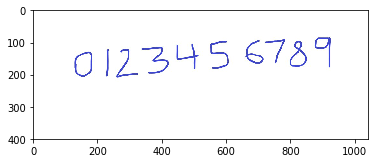

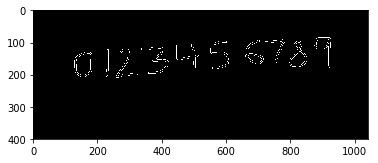

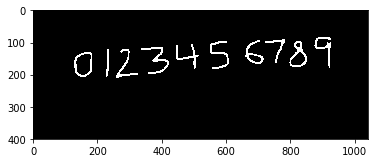

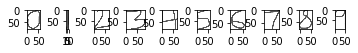

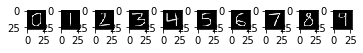

In [10]:
l = extract_features('D://txt.jpg')
ii = 1
for i in l:
    #print(i.shape)
    plt.subplot(10, 10, ii)
    plt.imshow(i.astype('uint8'),cmap='gray')
    ii +=1
plt.show()